In [256]:
reset -fs

In [257]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import unicodedata
from wordcloud import WordCloud

from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

from lime import lime_text
import gensim
import gensim.downloader as gensim_api
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend
import transformers

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup

In [258]:
import nlp_utils

In [259]:
fake = pd.read_csv('fake.csv')
true = pd.read_csv('true.csv')

In [260]:
true['category'] = 1
fake['category'] = 0

In [261]:
data = pd.concat([true, fake],ignore_index=True) #Merging the 2 datasets

In [262]:
data['text'] = data['text'] + " " + data['title']
del data['subject']
del data['date']
del data['title']

In [263]:
print(data.describe)

<bound method NDFrame.describe of                                                     text  category
0      WASHINGTON (Reuters) - The head of a conservat...         1
1      WASHINGTON (Reuters) - Transgender people will...         1
2      WASHINGTON (Reuters) - The special counsel inv...         1
3      WASHINGTON (Reuters) - Trump campaign adviser ...         1
4      SEATTLE/WASHINGTON (Reuters) - President Donal...         1
5      WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...         1
6      WEST PALM BEACH, Fla (Reuters) - President Don...         1
7      The following statements were posted to the ve...         1
8      The following statements were posted to the ve...         1
9      WASHINGTON (Reuters) - Alabama Secretary of St...         1
10     (Reuters) - Alabama officials on Thursday cert...         1
11     NEW YORK/WASHINGTON (Reuters) - The new U.S. t...         1
12     The following statements were posted to the ve...         1
13     The following stateme

In [264]:
text = data['text']


In [265]:
text

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
5        WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...
6        WEST PALM BEACH, Fla (Reuters) - President Don...
7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
9        WASHINGTON (Reuters) - Alabama Secretary of St...
10       (Reuters) - Alabama officials on Thursday cert...
11       NEW YORK/WASHINGTON (Reuters) - The new U.S. t...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
15       (Reuters) - A lottery drawing to settle a tied...
16       WASHINGTON (Reuters) - A Georgian-American bus.

average length of text: 2550.221


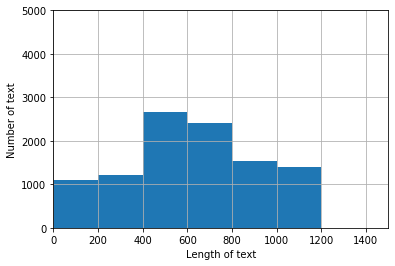

In [266]:
x = [len(text[i]) for i in range(text.shape[0])]

print('average length of text: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of text')
plt.ylabel('Number of text')       
plt.axis([0, 1500, 0, 5000])
plt.grid(True)
plt.show()

In [267]:
import string
print(string.punctuation)
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
print (punctuation_edit)
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [268]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

### Preprocessing

1) 

Preprocess a string.
:parameter
 :param text: string - name of column containing text
 :param lst_stopwords: list - list of stopwords to remove
 :param flg_stemm: bool - whether stemming is to be applied
 :param flg_lemm: bool - whether lemmitisation is to be applied
:return
 cleaned text

In [269]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
:return
    cleaned text
'''


'\nPreprocess a string.\n:parameter\n    :param text: string - name of column containing text\n    :param lst_stopwords: list - list of stopwords to remove\n    :param flg_stemm: bool - whether stemming is to be applied\n:return\n    cleaned text\n'

In [297]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [298]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [292]:
i=0
data["text_clean"] = data["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_lemm=True, lst_stopwords=lst_stopwords))

In [293]:
print(data.text_clean[0])

washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase nondefense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration already willing say going increase nondefense discretionary spending 7 percent meadow chairman small influential house freedom caucus said program democrat saying thats enough need g

In [300]:
# example
i = 0
print("--- original ---")
print(data["text"].iloc[i])

print("--- cleaning ---")
print(utils_preprocess_text(data["text"].iloc[i], 
                      lst_stopwords=None, flg_stemm=False, flg_lemm=True))

print("--- tokenization ---")
print(data["text"].iloc[i].split())

print("--- remove stopwords ---")
print(utils_preprocess_text(data["text"].iloc[i], 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      flg_stemm=False, flg_lemm=None))

print("--- stemming ---")
print(utils_preprocess_text(data["text"].iloc[i], 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      flg_stemm=True, flg_lemm=False))

print("--- lemmatisation ---")
print(utils_preprocess_text(data["text"].iloc[i],
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      flg_stemm=False, flg_lemm=True))

--- original ---
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs tha